# Métodos para buscar raíces

## Método de bisección 
Para aplicar este método consideremos tres sucesiones $a_n \le p_n \le b_n$ definidas por las siguientes relaciones

$$ p_n = \frac{a_n+b_n}{2},
\quad a_{n+1} = \begin{cases}
a_n & \mbox{si } f(a_n)\cdot f(p_n) <0 \\
p_n & \mbox{si } f(a_n)\cdot f(p_n) > 0\end{cases},
\quad b_{n+1} = \begin{cases}
b_n & \mbox{si } f(b_n)\cdot f(p_n) < 0 \\
p_n & \mbox{si } f(b_n)\cdot f(p_n) > 0\end{cases}$$

Donde los valores iniciales vienen dados por:

$$a_0 := a, \quad b_0 := b.$$

Se puede probrar que las tres sucesiones convergen al valor de la única raíz del intervalo:

$$ \lim_{n \to \infty} a_n = \lim_{n \to \infty} p_n = \lim_{n \to \infty} b_n.$$

### Ejemplo método de bisección

Para la función $f(x) = x^3-x-2$

In [3]:
f(x) = x^3-x-2
function biseccion(a,b)
    p = (a+b)/2
    for i in 1:50
        if  f(a)*f(p) > 0
            a = p
        end
        
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
    end
    return p,f(p)
end;

In [4]:
biseccion(0,2)

(1.5213797068045674, -1.3322676295501878e-15)

# Graficación usando matplotlib

## Graficas usando PyPlot: Ejemplo 1

In [5]:
using PyPlot

In [6]:
x=range(-10,10, step= 0.0001);
y=cos.(x);

In [7]:
@doc gcf


    Get the current figure.

    If there is currently no figure on the pyplot figure stack, a new one is
    created using `~.pyplot.figure()`.  (To test whether there is currently a
    figure on the pyplot figure stack, check whether `~.pyplot.get_fignums()`
    is empty.)
    

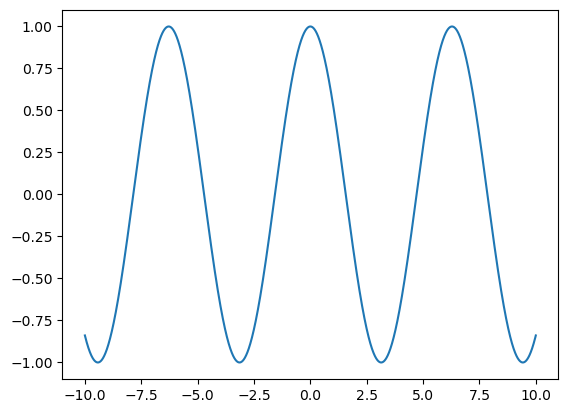

In [8]:
plot(x,y); # la sintaxis es muy parecida a matlab
gcf()

* matplotlib brinda mas opciones:

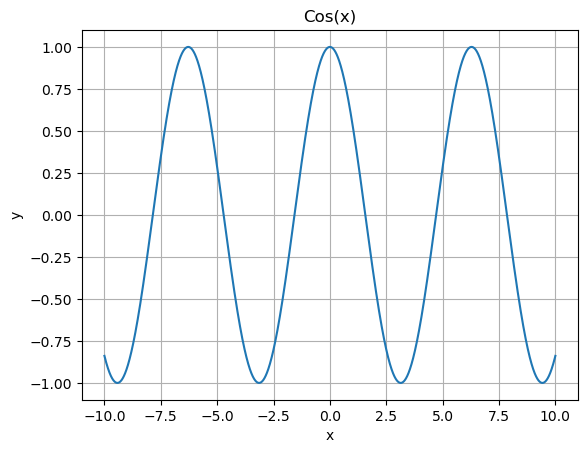

In [9]:
clf() # Limpia la figura
xlabel("x")
ylabel("y")
title("Cos(x)")
grid("on")
plot(x,y)
gcf()

## Graficas usando PyPlot: Ejemplo 2

En este ejemplo se muestra como converge el metodo de los babilonios a la raiz cuadrada deseada.

In [10]:
list=zeros(30);
S=10000;
x=0.0001;
for i in 1:30
    x=0.5(x+S/x);
    list[i]=x;
end

In [11]:
x=0:0.1:30;
y=sqrt(S)*ones(length(x));

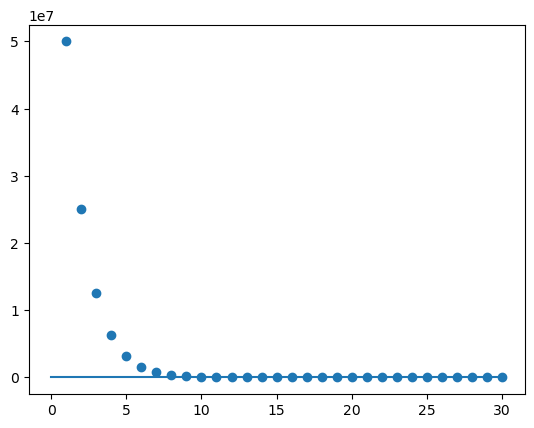

In [12]:
clf() # Limpia la figura
scatter(1:30,list);
plot(x,y);
gcf()

## Graficas usando PyPlot: Ejemplo 3

Gráfica que muestra las intersecciones de $x \tan(x)$ y $\sqrt(A-x^2)$

In [13]:
x=range(-10,10,step=0.001);
y1=sqrt.(Complex.(100.0.-x.^2))
y2=x.*tan.(x);
y3=y2-y1;

/home/david/.julia/conda/3/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/david/.julia/conda/3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


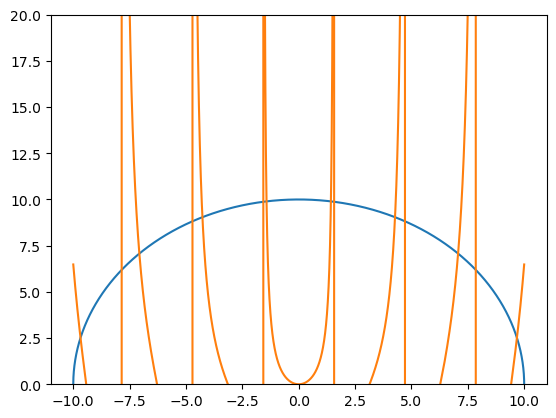

In [14]:
clf() # Limpia la figura
plot(x,y1)
plot(x,y2)
ylim(0,20)
gcf()

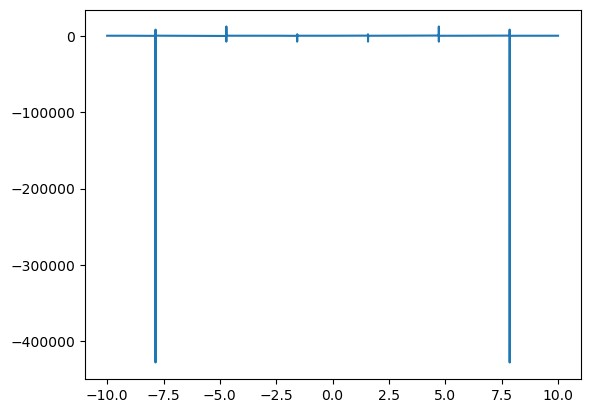

In [15]:
clf() # Limpia la figura
plot(x,y3)
gcf()

## Graficas usando PyPlot: Ejemplo 4

In [16]:
"""
Calcula las raices para el pozo finito con A=10.0
"""
function raices_pozo_finito(init)
    list=zeros(Complex64,100);
    x=init;
    for i in 1:100
        f= complex(x*tan(x)-sqrt(complex(10-x^2)))
        df=complex(x*sec(x)^2+x/sqrt(complex(10.0-x^2))+tan(x)) # Esto lo hice para evitar errores de dominio
        x=x-f/df;
        list[i]=x;
    end
    return list
end;

In [17]:
list1=raices_pozo_finito(0.1);
list2=raices_pozo_finito(1.1);
list3=raices_pozo_finito(1.5);
list4=raices_pozo_finito(3.5);

UndefVarError: UndefVarError: `Complex64` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [18]:
yscale("symlog", linthreshy=0.05)
plot(real(list1))
plot(real(list2))
plot(real(list3))
plot(real(list4))
show();

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /home/david/.julia/packages/PyCall/1gn3u/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError("SymmetricalLogScale.__init__() got an unexpected keyword argument 'linthreshy'")
  File "/home/david/.julia/conda/3/lib/python3.12/site-packages/matplotlib/pyplot.py", line 4427, in yscale
    gca().set_yscale(value, **kwargs)
  File "/home/david/.julia/conda/3/lib/python3.12/site-packages/matplotlib/axes/_base.py", line 74, in wrapper
    return get_method(self)(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/david/.julia/conda/3/lib/python3.12/site-packages/matplotlib/axis.py", line 805, in _set_axes_scale
    ax._axis_map[name]._set_scale(value, **kwargs)
  File "/home/david/.julia/conda/3/lib/python3.12/site-packages/matplotlib/axis.py", line 763, in _set_scale
    self._scale = mscale.scale_factory(value, self, **kwargs)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/david/.julia/conda/3/lib/python3.12/site-packages/matplotlib/scale.py", line 709, in scale_factory
    return scale_cls(axis, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^


# Usando Julia como CAS llamando a SymPy

Si todavia no contamos con la libreria en nuestra biblioteca, podemos añadirla haciendo:

In [19]:
using SymPy

Primero definimos las variables simbólicas que vamos a usar:

In [20]:
A,x,a,n,m=symbols("A,x,a,n,m")

(A, x, a, n, m)

In [21]:
typeof(n)

Sym{PyCall.PyObject}

Evaluando la suma sugerida en el exámen

In [22]:
summation(a^n,(n,0,oo))

⎧   1                 
⎪ ─────    for │a│ < 1
⎪ 1 - a               
⎪                     
⎪  ∞                  
⎪ ___                 
⎨ ╲                   
⎪  ╲    n             
⎪  ╱   a    otherwise 
⎪ ╱                   
⎪ ‾‾‾                 
⎪n = 0                
⎩                     

In [23]:
oo

∞

In [24]:
PI

π

In [25]:
typeof(PI)

Sym{PyCall.PyObject}

In [26]:
log(E)

1

In [27]:
typeof(log(E))

Sym{PyCall.PyObject}

## Cálculo

In [28]:
methods(sin)

# 19 methods for generic function "sin" from Base:
  [1] sin(::IrrationalConstants.Halfπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/vp5v4/src/trigonometric.jl:10
  [2] sin(::Irrational{:π})
     @ Base.MathConstants mathconstants.jl:146
  [3] sin(::Missing)
     @ Base.Math math.jl:1533
  [4] sin(a::ComplexF16)
     @ Base.Math math.jl:1512
  [5] sin(a::Float16)
     @ Base.Math math.jl:1511
  [6] sin(::IrrationalConstants.Quartπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/vp5v4/src/trigonometric.jl:11
  [7] sin(::IrrationalConstants.Twoπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/vp5v4/src/trigonometric.jl:8
  [8] sin(x::BigFloat)
     @ Base.MPFR mpfr.jl:860
  [9] sin(::IrrationalConstants.Fourπ)
     @ IrrationalConstants ~/.julia/packages/IrrationalConstants/vp5v4/src/trigonometric.jl:9
 [10] sin(D::LinearAlgebra.Diagonal)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.3+0.x64.linux.gnu/share/julia/stdlib/v1.11/LinearAlgebra/src/diagonal.jl:802
 [11] sin(x::T) where T<:Union{Float32, Float64}
     @ Base.Math special/trig.jl:29
 [12] sin(x::Real)
     @ Base.Math math.jl:1528
 [13] sin(x::Sym, args...; kwargs...)
     @ SymPy ~/.julia/packages/SymPyCore/Dg45i/src/SymPy/gen_methods_sympy.jl:26
 [14] sin(J::LinearAlgebra.UniformScaling)
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.3+0.x64.linux.gnu/share/julia/stdlib/v1.11/LinearAlgebra/src/uniformscaling.jl:173
 [15] sin(A::LinearAlgebra.Hermitian{var"#s5029", S} where {var"#s5029"<:Complex, S<:(AbstractMatrix{<:var"#s5029"})})
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.3+0.x64.linux.gnu/share/julia/stdlib/v1.11/LinearAlgebra/src/symmetric.jl:714
 [16] sin(A::Union{LinearAlgebra.Hermitian{var"#s5030", S}, LinearAlgebra.Symmetric{var"#s5030", S}} where {var"#s5030"<:Real, S})
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.3+0.x64.linux.gnu/share/julia/stdlib/v1.11/LinearAlgebra/src/symmetric.jl:710
 [17] sin(A::AbstractMatrix{<:Complex})
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.3+0.x64.linux.gnu/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:1055
 [18] sin(A::AbstractMatrix{<:Real})
     @ LinearAlgebra ~/.julia/juliaup/julia-1.11.3+0.x64.linux.gnu/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:1048
 [19] sin(z::Complex{T}) where T
     @ complex.jl:894

In [29]:
limit(sin(x)/x, x=>0)

1

In [30]:
integrate(x,x)

 2
x 
──
2 

In [31]:
integrate(x,(x,0,1))

1/2

In [32]:
diff(sin(x),x)

cos(x)

In [33]:
typeof(diff(sin(x),x))

Sym{PyCall.PyObject}

Si $x$ es simbólica y llamamos al $\sin$, Julia autómaticamente usa la función apropiada:

Manipulación y simplificación de expresiones

In [34]:
expression = diff(x*tan(x)-sqrt(A-x^2),x)

  ⎛   2       ⎞        x              
x⋅⎝tan (x) + 1⎠ + ─────────── + tan(x)
                     ________         
                    ╱      2          
                  ╲╱  A - x           

In [35]:
func = simplify(expression)

   x           x              
─────── + ─────────── + tan(x)
   2         ________         
cos (x)     ╱      2          
          ╲╱  A - x           

In [36]:
simplify(sin(2*PI*n))

sin(2⋅π⋅n)

In [37]:
n = symbols("n", integer=true)

n

In [38]:
n.is_integer

true

In [39]:
simplify(sin(PI*2*n))

0

In [40]:
simplify(sin(x)*tan(x)/sec(x))

   2   
sin (x)

In [41]:
collect(func,x)

  ⎛   1           1     ⎞         
x⋅⎜─────── + ───────────⎟ + tan(x)
  ⎜   2         ________⎟         
  ⎜cos (x)     ╱      2 ⎟         
  ⎝          ╲╱  A - x  ⎠         

In [42]:
@syms x y
expr = x^2 + 2*x*y + y^2 + x + y

# Collect terms with respect to x
collected_expr = collect(expr, x)

collected_expr

 2                  2    
x  + x⋅(2⋅y + 1) + y  + y

In [43]:
# Define the expression
expr = x^2 - 5*x + 6

# Factor the expression
factored_expr = factor(expr)

factored_expr

(x - 3)⋅(x - 2)

In [44]:
# Expandir expresiones
expand((x + 1)^2)

 2          
x  + 2⋅x + 1

In [45]:
(x^2 + 2*x + 1)/(x^2 + x)

 2          
x  + 2⋅x + 1
────────────
    2       
   x  + x   

In [46]:
# Cancelar expresiones
cancel((x^2 + 2*x + 1)/(x^2 + x))

x + 1
─────
  x  

## Manipulación de funciones

In [47]:
func

   x           x              
─────── + ─────────── + tan(x)
   2         ________         
cos (x)     ╱      2          
          ╲╱  A - x           

In [ ]:
f2=nothing
f2=subs(func,A=>10)

   x      0.316227766016838⋅x         
─────── + ─────────────────── + tan(x)
   2           ____________           
cos (x)       ╱          2            
            ╲╱  1 - 0.1⋅x             

Una estructura que se usa aquí pero que es bastante útil en general, son los diccionarios:

In [140]:
dictionary = Dict("A"=>10.0,"x"=>PI)

Dict{String, Number} with 2 entries:
  "A" => 10.0
  "x" => pi

In [141]:
dictionary["x"]

π

In [142]:
f2=subs(func,dictionary)

    0.316227766016838⋅π
π + ───────────────────
         ____________  
        ╱          2   
      ╲╱  1 - 0.1⋅π    

In [143]:
func.subs(A, 10.0)

   x      0.316227766016838⋅x         
─────── + ─────────────────── + tan(x)
   2           ____________           
cos (x)       ╱          2            
            ╲╱  1 - 0.1⋅x             

In [144]:
func.subs(dictionary)

    0.316227766016838⋅π
π + ───────────────────
         ____________  
        ╱          2   
      ╲╱  1 - 0.1⋅π    

In [153]:
dictionary_not_text = Dict(A=>10.0,x=>PI)

Dict{Sym{PyCall.PyObject}, Number} with 2 entries:
  x => pi
  A => 10.0

In [154]:
dictionary_not_text[x]

π

In [155]:
func.subs(dictionary_not_text)

   x      0.316227766016838⋅x         
─────── + ─────────────────── + tan(x)
   2           ____________           
cos (x)       ╱          2            
            ╲╱  1 - 0.1⋅x             

Lo que pasa si evaluamos en otra variable simbólica:

In [50]:
f2(n)

   n      0.316227766016838⋅n         
─────── + ─────────────────── + tan(n)
   2           ____________           
cos (n)       ╱          2            
            ╲╱  1 - 0.1⋅n             

In [51]:
typeof(f2)

Sym{PyCall.PyObject}

Uno puede evaluar directamente la función en un valor númerico, sin embargo el _output_ sigue siendo un objeto simbólico:

In [52]:
res = f2(0.1)

0.232979976586117

In [53]:
typeof(res)

Sym{PyCall.PyObject}

Como convertir números de _SymPy_ a flotantes:

In [54]:
resf = N(res)

0.2329799765861167

In [55]:
typeof(resf)

Float64

Podemos pasar el resultado a otra función y se sigue tratando como un objeto simbólico:

In [56]:
cos(f2(0.1))

0.972982705126180

Con la función _lambify_ podemos convertir una función de SymPy directamente en una función de Julia,típicamente hacer esto nos permite hacer rutinas mas eficientes:

In [57]:
@show f2

f2 = x/cos(x)^2 + 0.316227766016838*x/sqrt(1 - 0.1*x^2) + tan(x)


   x      0.316227766016838⋅x         
─────── + ─────────────────── + tan(x)
   2           ____________           
cos (x)       ╱          2            
            ╲╱  1 - 0.1⋅x             

In [58]:
fjulia=lambdify(f2)

Callable function with a single variable x

In [59]:
res = fjulia(0.1)

0.23297997658611666

In [60]:
typeof(res)

Float64

Otra forma de declarar variables simbólicas:

In [61]:
@syms x y z

(x, y, z)

In [62]:
x'==x

false

In [168]:
x = symbols("x", real=true)

x

In [170]:
x.is_real

true

In [171]:
x'==x

true

In [172]:
typeof(x)

Sym{PyCall.PyObject}

Podemos comprobar que todo salio bien haciendo la derivada númerica:

In [66]:
function ff(x)
    A=10.0
    return  x*tan(x)-sqrt(A-x^2)
end

ff (generic function with 1 method)

In [67]:
(ff(0.1+0.00001)-ff(0.1))/0.00001

0.23299176210578307

Si queremos convertir funciones de Julia en funciones de SymPy, podemos hacer los siguiente:

Primero definimos una función en Julia:

In [173]:
function r(x)
   return x^2 
end

r (generic function with 1 method)

In [174]:
r(x) = x^2

r (generic function with 1 method)

In [175]:
r(0.1)

0.010000000000000002

Luego, como ya definimos $x$ como una variable simbólica, simplemente evaluamos nuestra función en dicha variable:

In [176]:
r(x)

 2
x 

In [177]:
typeof(r(x))

Sym{PyCall.PyObject}

Ya podemos, por ejemplo, derivar sin problema:

In [178]:
diff(r(x),x)

2⋅x

In [179]:
diff(cos(r(x)),x)

        ⎛ 2⎞
-2⋅x⋅sin⎝x ⎠

## Solución de ecuaciones algebráicas

In [186]:
vec = solve(x^2 - x, x)

2-element Vector{Sym{PyCall.PyObject}}:
 0
 1

In [188]:
typeof(vec)

Vector{Sym{PyObject}} (alias for Array{Sym{PyCall.PyObject}, 1})

In [191]:
N(vec[1])

0

In [183]:
# Define the equation
eq = Eq(x^2, x)

# Solve the equation
solutions = solve(eq, x)

solutions

2-element Vector{Sym{PyCall.PyObject}}:
 0
 1

In [184]:
eq

 2    
x  = x

In [192]:
# Define the equation
eq = Eq(x^2 - 5*x + 6, 0)

# Solve the equation
solutions = solve(eq, x)

solutions

2-element Vector{Sym{PyCall.PyObject}}:
 2
 3

In [194]:
eq1 = Eq(x + y, 10)
eq2 = Eq(x - y, 2)

# Solve the system of equations
solutions = solve([eq1, eq2], [x, y])

solutions

Dict{Sym{PyCall.PyObject}, Sym{PyCall.PyObject}} with 2 entries:
  x => 6
  y => 4

In [195]:
typeof(solutions)

Dict{Sym{PyCall.PyObject}, Sym{PyCall.PyObject}}

In [199]:
solutions[x]

6

In [197]:
solutions[y]

4

In [200]:
# Define the equation
eq = Eq(x^4 - 5*x + 6, 0)

# Solve the equation
solutions = solve(eq, x)

solutions

4-element Vector{Sym{PyCall.PyObject}}:
 -sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3))/2 + sqrt(-2*(25/16 + sqrt(1423)*I/16)^(1/3) - 10/sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3)) - 4/(25/16 + sqrt(1423)*I/16)^(1/3))/2
  sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3))/2 - sqrt(-2*(25/16 + sqrt(1423)*I/16)^(1/3) + 10/sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3)) - 4/(25/16 + sqrt(1423)*I/16)^(1/3))/2
 -sqrt(-2*(25/16 + sqrt(1423)*I/16)^(1/3) - 10/sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3)) - 4/(25/16 + sqrt(1423)*I/16)^(1/3))/2 - sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3))/2
  sqrt(-2*(25/16 + sqrt(1423)*I/16)^(1/3) + 10/sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(1/3)) - 4/(25/16 + sqrt(1423)*I/16)^(1/3))/2 + sqrt(4/(25/16 + sqrt(1423)*I/16)^(1/3) + 2*(25/16 + sqrt(1423)*I/16)^(

In [205]:
x = symbols("x")
# Define the equation
eq = Eq(4x^5-x^4 - 5*x^2+3x + 6, 0)

# Solve the equation
solutions = solve(eq, x)

solutions

5-element Vector{Sym{PyCall.PyObject}}:
 CRootOf(4*x^5 - x^4 - 5*x^2 + 3*x + 6, 0)
 CRootOf(4*x^5 - x^4 - 5*x^2 + 3*x + 6, 1)
 CRootOf(4*x^5 - x^4 - 5*x^2 + 3*x + 6, 2)
 CRootOf(4*x^5 - x^4 - 5*x^2 + 3*x + 6, 3)
 CRootOf(4*x^5 - x^4 - 5*x^2 + 3*x + 6, 4)

In [204]:
solutions[1]

       ⎛   5    4      2             ⎞
CRootOf⎝4⋅x  - x  - 5⋅x  + 3⋅x + 6, 0⎠

In [86]:
typeof(solutions[1])

Sym{PyCall.PyObject}

In [206]:
N(solutions[1])

-0.7318367457018344

A continuación un símbolo útil

In [208]:
solutions[1]|>N

-0.7318367457018344

In [209]:
x|>cos

cos(x)

## Ecuaciones diferenciales

Arriba definimos ``f``, por lo tanto está cargado en el kernel. Resulta que no se puede, o al menos es muy dificil eliminar funciones de Julia. Puede que sea señal de que está más orientado a scripts. Es un inconveniente menor.

In [251]:
g = SymFunction("g")(x)

# Differentiate the symbolic function with respect to x
diff_g = diff(g, x)

d       
──(g(x))
dx      

In [255]:
diff(g)

d       
──(g(x))
dx      

In [256]:
diff(g,y)

0

Problemas de valor inicial

Primero veamos la solución general:

In [257]:
dsolve(diff(g,x,x) - g(x), g(x))

           -x       x
g(x) = C₁⋅ℯ   + C₂⋅ℯ 

In [259]:
ics = Dict(g(0) => 1, diff(g)(0) => 2)

Dict{Sym{PyCall.PyObject}, Int64} with 2 entries:
  g(0)                            => 1
  Subs(Derivative(g(x), x), x, 0) => 2

In [261]:
dsolve(diff(g,x,x) - g(x), g(x), ics=ics)

          x    -x
       3⋅ℯ    ℯ  
g(x) = ──── - ───
        2      2 

In [266]:
using SymPy

# Define the symbols
x = symbols("x", real=true)
k = symbols("k", real=true)
ψ = SymFunction("ψ")(x)
ħ = symbols("ħ", real=true, positive=true)
m = symbols("m", real=true, positive=true)

# Define the Schrödinger equation
schrodinger_eq = Eq(-ħ^2 / (2*m) * diff(ψ, x, x), k * ψ)

# Solve the differential equation
solution = dsolve(schrodinger_eq, ψ)

solution

                      ____                  ____
           -√2⋅√m⋅x⋅╲╱ -k         √2⋅√m⋅x⋅╲╱ -k 
           ────────────────       ──────────────
                  ħ                     ħ       
ψ(x) = C₁⋅ℯ                 + C₂⋅ℯ              

In [268]:
@show solution

solution = Eq(ψ(x), C1*exp(-sqrt(2)*sqrt(m)*x*sqrt(-k)/ħ) + C2*exp(sqrt(2)*sqrt(m)*x*sqrt(-k)/ħ))


                      ____                  ____
           -√2⋅√m⋅x⋅╲╱ -k         √2⋅√m⋅x⋅╲╱ -k 
           ────────────────       ──────────────
                  ħ                     ħ       
ψ(x) = C₁⋅ℯ                 + C₂⋅ℯ              

In [269]:
ψ(x)

ψ(x)

In [267]:
diff(ψ,x)(1)

⎛d       ⎞│   
⎜──(ψ(x))⎟│   
⎝dx      ⎠│x=1

In [270]:
using SymPy

# Define the symbols
x = symbols("x", real=true)
k = symbols("k", real=true)
ψ = SymFunction("ψ")(x)
ħ = symbols("ħ", real=true, positive=true)
m = symbols("m", real=true, positive=true)

# Define the boundary conditions
ics = Dict(ψ(0) => 0, ψ(1) => 0)
# Define the Schrödinger equation
schrodinger_eq = Eq(-diff(ψ, x, x), k * ψ)

# Solve the differential equation
solution = dsolve(schrodinger_eq, ψ, ics = ics)
simplify(solution)

ψ(x) = 0

Solo nos da soluciones triviales

In [273]:
using SymPy

# Define the symbols
x = symbols("x", real=true)
k = symbols("k", real=true, positive=true)
ψ = SymFunction("ψ")(x)
ħ = symbols("ħ", real=true, positive=true)
m = symbols("m", real=true, positive=true)

# Define the Schrödinger equation
schrodinger_eq = Eq(-diff(ψ, x, x), k * ψ)

# Solve the differential equation
solution = dsolve(schrodinger_eq, ψ)

ψ(x) = C₁⋅sin(√k⋅x) + C₂⋅cos(√k⋅x)

In [276]:
sol = solution.rhs

C₁⋅sin(√k⋅x) + C₂⋅cos(√k⋅x)

In [277]:
sol.free_symbols

Set{Sym} with 4 elements:
  C1
  x
  C2
  k

Más funciones de simplificación

Como evaluar las soluciones:

In [278]:
a, b, c, d = symbols("a b c d")

(a, b, c, d)

In [279]:
sol(a,b,c,d)

a⋅sin(√c⋅d) + b⋅cos(√c⋅d)

Cuidado con lo de arriba, el orden parece que siempre es el orden en el que están los símbolos en la expresión

In [280]:
sol*sol'|>simplify

                              ⎛          __             __⎞
(C₁⋅sin(√k⋅x) + C₂⋅cos(√k⋅x))⋅⎝sin(√k⋅x)⋅C₁ + cos(√k⋅x)⋅C₂⎠

In [281]:
# Define real versions of C1 and C2
C1 = symbols("C1", real=true)
C2 = symbols("C2", real=true)

C₂

In [282]:
sol = sol(C1,C2)

C₁⋅sin(√k⋅x) + C₂⋅cos(√k⋅x)

In [284]:
sol*sol'|>simplify

                             2
(C₁⋅sin(√k⋅x) + C₂⋅cos(√k⋅x)) 

In [285]:
sol*sol'|>expand

  2    2                                         2    2      
C₁ ⋅sin (√k⋅x) + 2⋅C₁⋅C₂⋅sin(√k⋅x)⋅cos(√k⋅x) + C₂ ⋅cos (√k⋅x)

In [287]:
solve(sol.subs(x,0), C2)

1-element Vector{Sym{PyCall.PyObject}}:
 0

In [288]:
sol = sol.subs(C2, 0)

C₁⋅sin(√k⋅x)

In [289]:
solve(sol.subs(x,1), k)

1-element Vector{Sym{PyCall.PyObject}}:
 pi^2

In [290]:
solveset(sol.subs(x,1), k)

{k │ k ∊ ℂ ∧ (sin(√k) = 0)}

In [294]:
SymPy.sympy.Reals

ℝ

In [295]:
solveset(sol.subs(x,1), k, domain=SymPy.sympy.Reals)

⎧ 2 │                             ⎫   ⎧ 2 │                                 ⎫
⎨x  │ x ∊ [0, ∞) ∩ {2⋅n⋅π │ n ∊ ℤ}⎬ ∪ ⎨x  │ x ∊ [0, ∞) ∩ {2⋅n⋅π + π │ n ∊ ℤ}⎬
⎩   │                             ⎭   ⎩   │                                 ⎭

Desigualdades

In [309]:
# Define the inequality
inequality = Ge(x^2 - 4, 0)

# Solve the inequality
solution = solveset(inequality, x, domain=SymPy.sympy.Reals)

(-∞, -2] ∪ [2, ∞)

In [318]:
# Define the inequality
inequality = Ge(log(1/x^2), 1)

# Solve the inequality
solution = solveset(inequality, x, domain=SymPy.sympy.Reals)|>simplify

⎡  -1/2   ⎞   ⎛    -1/2⎤
⎣-ℯ    , 0⎠ ∪ ⎝0, ℯ    ⎦

# Ejercicios
* Intentar hacer esto: https://docs.sympy.org/latest/guides/solving/solve-matrix-equation.html en Julia.
    * Pueden usar esto como referencia también: https://juliapy.github.io/SymPy.jl/dev/Tutorial/matrices/

* __Montecarlo:__ Calcular $\pi$ utilizando montecarlo: https://en.wikipedia.org/wiki/Monte_Carlo_integration
    * Para ello investigar que funciones de Julia generan números aleatorios uniformes.